In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/workspaces/Data-Analyst-Project-Portfolio/Netflix-WatchPattern-Analytics/data/netflix_cleaned.csv")

In [4]:
# Convert Date
df['Date'] = pd.to_datetime(df['Watch_Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

In [5]:
if 'Genre' in df.columns:
    df['Genre'] = df['Genre'].str.strip()

/tmp/ipykernel_11243/3109758820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="crest")


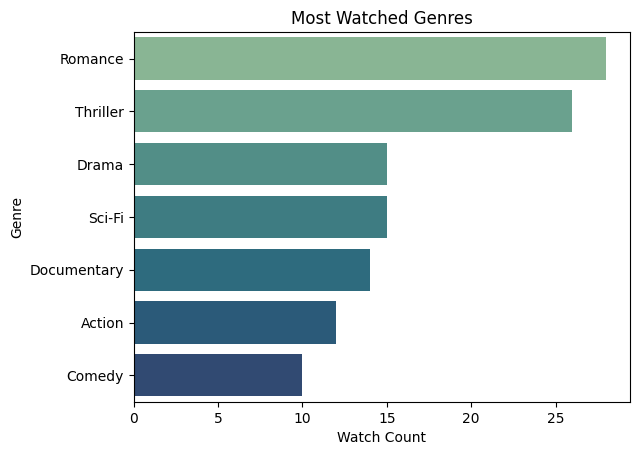

In [6]:
genre_counts = df['Genre'].value_counts()

sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="crest")
plt.title("Most Watched Genres")
plt.xlabel("Watch Count")
plt.ylabel("Genre")
plt.show()

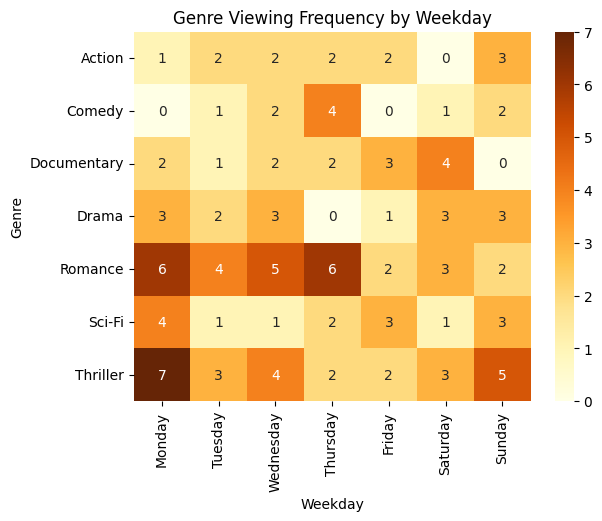

In [7]:
df['Weekday'] = df['Date'].dt.day_name()
genre_weekday = pd.crosstab(df['Genre'], df['Weekday'])

# Order weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
genre_weekday = genre_weekday[ordered_days]

sns.heatmap(genre_weekday, cmap="YlOrBr", annot=True, fmt="d")
plt.title("Genre Viewing Frequency by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Genre")
plt.show()

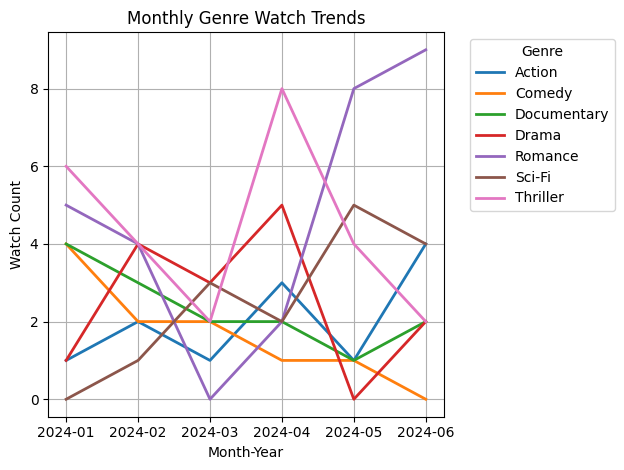

In [8]:
df['MonthYear'] = df['Date'].dt.to_period('M').astype(str)
monthly_genres = df.groupby(['MonthYear', 'Genre']).size().unstack().fillna(0)

monthly_genres.plot(kind='line', linewidth=2)
plt.title("Monthly Genre Watch Trends")
plt.xlabel("Month-Year")
plt.ylabel("Watch Count")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()